In [398]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
import networkx as nx

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [399]:
from cellmating.cells import Cell, Cells
from cellmating.mating import Mating
from cellmating.cells import create_cells_from_image, Cells, create_cells_from_tracker
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [400]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  195


In [401]:
file_name = file_list[0]

67


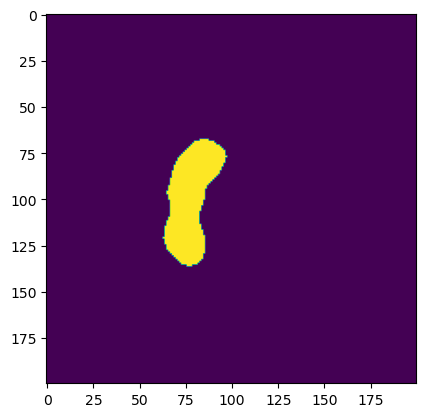

In [402]:
key = int(file_name.split("_")[-1][:-4])
image = imread(file_name)
plt.imshow(image[-1,-2] == key)
g = load_from_pkl(file_name[:-4]+".network")
cells = create_cells_from_image(image[:,-1], g)
key = int(file_name.split("_")[-1][:-4])
key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
print(key)

In [403]:
c_mating = Mating(image=image, cells=cells, center=key, g=g)

In [404]:
from script_wlli.for_check_result_utils import draw_subgraph

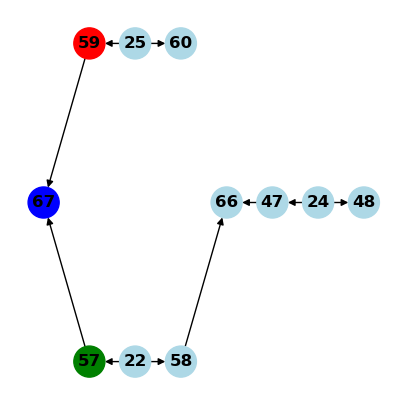

In [405]:
draw_subgraph(g, key, c_mating.p, c_mating.m)

In [81]:
### check one time point

In [406]:
time = 22

In [407]:
data = c_mating.center_cells_potential_pairs(time)

In [408]:
pairs = data[["p_id", "m_id", "flag"]].drop_duplicates()
print("pairs:", pairs.shape[0])
pairs

pairs: 6


,p_id,m_id,flag
0,59,57,True
1,18,57,False
2,23,57,False
3,51,57,False
4,52,57,False
5,53,57,False


In [409]:
id=0
p, m ,f = pairs.iloc[id].astype(np.int_)
ep_data = data.iloc[id]

In [410]:
p_dgree = ep_data.p_angle*180/np.pi
m_dgree = ep_data.m_angle*180/np.pi

p_coord = c_mating.cells[p].coordinates(time)[0]
p_axis = p_coord[[0,30]]
p_contact = p_coord[ep_data.p_angle_index]

m_coord = c_mating.cells[m].coordinates(time)[0]
m_axis = m_coord[[0,30]]
m_contact = m_coord[ep_data.m_angle_index]

In [412]:
p_s = c_mating.neighbor(p, frame=time, ctype=True)
p_d = c_mating.neighbor(p, frame=time, ctype=False)

m_s = c_mating.neighbor(m, frame=time, ctype=True)
m_d = c_mating.neighbor(m, frame=time, ctype=False)

In [413]:
from cellmating.plotlib._gray2color import multigray2rgb

In [414]:
show_image = multigray2rgb(image[time, 0:3], axis=0,  colors_channel={"r": 2, "g": 1, "a":0})

In [415]:
node_center

array([111.24810606,  75.24431818])

angle p:  21.790566988507656 
angle m:  30.368096756764487


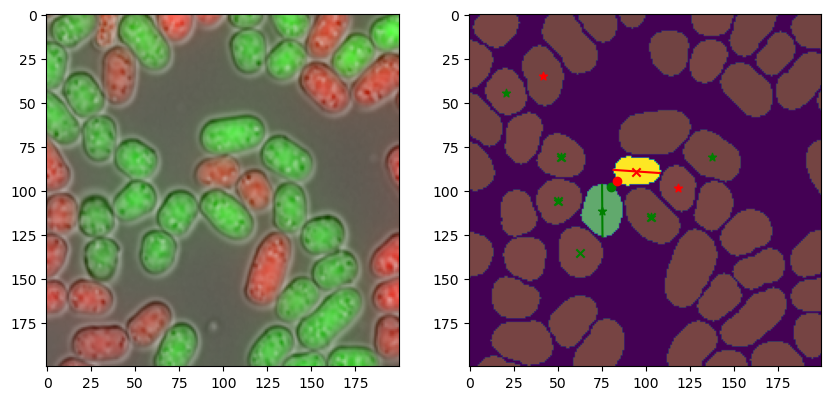

In [416]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
axs[0].imshow(show_image)
axs[1].imshow((image[time, -1]%1000==p)*1 + (image[time, -1]%1000==m)*2)
axs[1].imshow(image[time, -1], alpha=0.3)
axs[1].plot(p_axis[:,1], p_axis[:,0], "g")
axs[1].plot(m_axis[:,1], m_axis[:,0], "r")

axs[1].scatter(p_contact[1], p_contact[0], marker='o', c="g")
axs[1].scatter(m_contact[1], m_contact[0], marker='o', c="r")

for key in p_s:
    node_center = (c_mating.cells[key].center(frame=time)[0]).astype(np.float_)
    plt.scatter(node_center[1], node_center[0], marker="x", c='g')

for key in p_d:
    node_center = (c_mating.cells[key].center(frame=time)[0]).astype(np.float_)
    plt.scatter(node_center[1], node_center[0], marker="x", c='r')

for key in m_s:
    node_center = (c_mating.cells[key].center(frame=time)[0]).astype(np.float_)
    plt.scatter(node_center[1], node_center[0], marker="*",c='r')

for key in m_d:
    node_center = (c_mating.cells[key].center(frame=time)[0]).astype(np.float_)
    plt.scatter(node_center[1], node_center[0], marker="*",c='g')

print("angle p: ", p_dgree, "\nangle m: ", m_dgree)